# Perceptron

### **Heaviside Step Function**

\begin{cases}
0 & \text{if } z < 0 \\
1 & \text{if } z \geq 0
\end{cases}

---

### **Sign Function (sgn)**

\begin{cases}
-1 & \text{if } z < 0 \\
\;\;\;\,0 & \text{if } z = 0 \\
+1 & \text{if } z > 0
\end{cases}

### Fully Connected Layer Output

The output of a fully connected (dense) neural network layer is computed as:

$$
h_{W, b}(X) = \phi(XW + b)
$$


Where:
- X  is the input feature matrix (rows = samples, columns = features)
- W is the weight matrix (rows = features, columns = neurons)
- b is the bias vector (one bias per neuron)
- $\phi$ is the activation function (e.g., ReLU, sigmoid, step function)


### **Perceptron Weight Update Rule**

The perceptron learning rule updates each weight as follows:

$$
w_{i,j}^{(\text{next})} = w_{i,j} + \eta \cdot (y_j - \hat{y}_j) \cdot x_i
$$

#### **Where:**

- $w_{i,j}$: weight connecting the $i^{\text{th}}$ input to the $j^{\text{th}}$ output neuron  
- $x_i$: the $i^{\text{th}}$ input value of the current training instance  
- $\hat{y}_j$: the **predicted output** of the $j^{\text{th}}$ neuron  
- $y_j$: the **target (true) output** of the $j^{\text{th}}$ neuron  
- $\eta$: the **learning rate**, a small positive value that controls how fast the model learns  
  


## Perceptron

In [ ]:
import numpy as np  
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True) # as_frame=True returns a pandas DataFrame
iris

In [ ]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0) 

In [ ]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X, y)

In [ ]:
X_new = [[2, 0.5], [3, 1]]
perceptron.predict(X_new)

## MLPRegressor

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
housing = fetch_california_housing(as_frame=True)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

In [ ]:
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

# Keras

In [2]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Sequential

### Classfication

In [5]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

In [8]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Ankle boot'

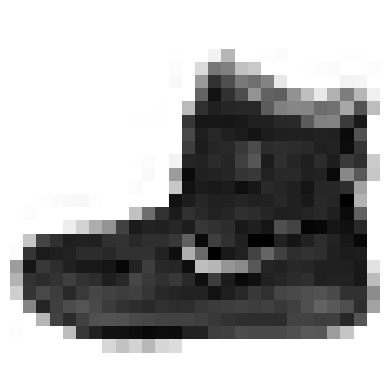

In [11]:
# extra code
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

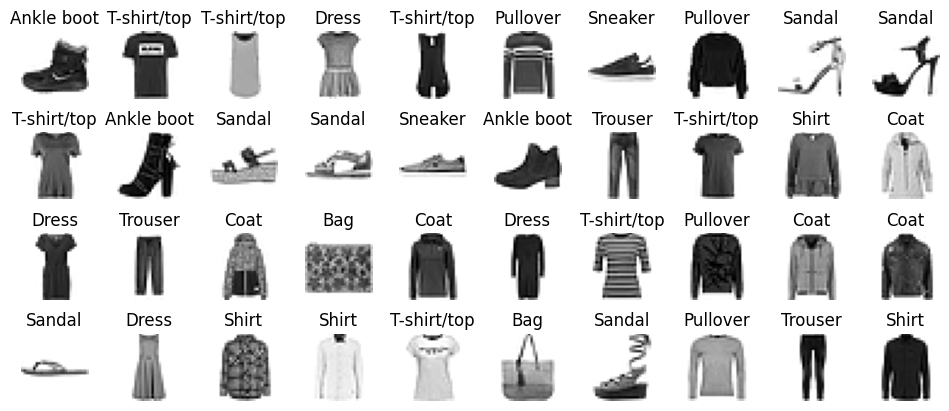

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
# tf.keras.backend.clear_session()
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28],name="input"),
#     tf.keras.layers.Dense(300, activation="relu",name="hidden1"),
#     tf.keras.layers.Dense(100, activation="relu",name="hidden2"),
#     tf.keras.layers.Dense(10, activation="softmax",name="output")
# ])

# model.summary()

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

In [ ]:
model.get_layer("dense_1") is hidden1

In [ ]:
weights, biases = hidden1.get_weights()
weights, biases

In [ ]:
weights.shape, biases.shape

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [ ]:
tf.keras.backend.clear_session()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

In [ ]:
np.array(class_names)[y_pred]

### Regression

In [13]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

In [14]:
reg_model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history = reg_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

NameError: name 'model' is not defined

In [ ]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [ ]:
y_pred.round(2)

## Functional API

The below code will send all the data through the input

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(300, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(100, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [ ]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

In [ ]:
model = tf.keras.Model(inputs=[input_], outputs=[output])

The below code will send different subsets to the input

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [ ]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [ ]:
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=10, validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

## Subclassing

In [ ]:
class DeepAndWideModel(tf.keras.Model):
    def __init__(self, units = 30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

In [ ]:
model = DeepAndWideModel()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [ ]:
reg_model.save("my_keras_model", save_format="tf")

In [ ]:
loaded_model = tf.keras.models.load_model("my_keras_model")

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)
history = model.fit([...], callbacks=[checkpoint_cb])

## Callbacks

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([...], callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

## Tensorboard

In [4]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")
    
run_logdir = get_run_logdir() # e.g., my_logs/run_2022_08_01_17_25_59

pip install -q -U tensorboard-plugin-profile

tensorboard --logdir=logs --port=6006

In [16]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
reg_model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history = reg_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

2025-07-01 23:00:04.926096: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-07-01 23:00:04.926121: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-07-01 23:00:04.926540: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


Epoch 1/20
 252/1719 [===>..........................] - ETA: 1s - loss: 10.2024 - root_mean_squared_error: 3.1941

2025-07-01 23:00:06.068365: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-07-01 23:00:06.068376: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-07-01 23:00:06.172186: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2025-07-01 23:00:06.179008: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2025-07-01 23:00:06.181823: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: my_logs/run_2025_07_01_22_58_52/plugins/profile/2025_07_01_23_00_06/MAC-9AEF73.station.xplane.pb


1719/1719 [==============================] - 2s 1ms/step - loss: 8.6345 - root_mean_squared_error: 2.9385 - val_loss: 8.4115 - val_root_mean_squared_error: 2.9004
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2988 - root_mean_squared_error: 2.8808 - val_loss: 8.3909 - val_root_mean_squared_error: 2.8969
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2833 - root_mean_squared_error: 2.8781 - val_loss: 8.4304 - val_root_mean_squared_error: 2.9037
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2771 - root_mean_squared_error: 2.8770 - val_loss: 8.4407 - val_root_mean_squared_error: 2.9054
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2693 - root_mean_squared_error: 2.8756 - val_loss: 8.3906 - val_root_mean_squared_error: 2.8969
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2619 - root_mean_squared_error: 2.8744 - val_loss: 8.3682 - val

KeyboardInterrupt: 

## Hyper-parameter tuning

In [17]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [21]:
import keras_tuner as kt
random_search_tuner = kt.RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=5, 
    overwrite=True,
    directory="my_fashion_mnist", 
    project_name="my_rnd_search", 
    seed=42)

random_search_tuner.search(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 09s]
val_accuracy: 0.7746000289916992

Best val_accuracy So Far: 0.8601999878883362
Total elapsed time: 00h 00m 52s


In [23]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]
best_model

In [24]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [25]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8601999878883362


In [26]:
best_trial.metrics.get_last_value("val_accuracy")

0.8601999878883362

In [27]:
class MyClassificationHyperModel(kt.HyperModel):
    
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [28]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), 
    objective="val_accuracy", 
    seed=42,
    max_epochs=10,
    factor=3,
    hyperband_iterations=2,
    overwrite=True, 
    directory="my_fashion_mnist", 
    project_name="hyperband")

In [29]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 15m 13s]
val_accuracy: 0.843999981880188

Best val_accuracy So Far: 0.8880000114440918
Total elapsed time: 01h 49m 41s


In [ ]:
bayesian_opt_tuner = kt.BayesianOptimization(MyClassificationHyperModel(), objective="val_accuracy", seed=42,
max_trials=10, alpha=1e-4, beta=2.6,overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")

bayesian_opt_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, tensorboard_cb])

# MNIST

In [30]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [31]:
X_train_full.shape

(60000, 28, 28)

In [32]:
X_train_full.dtype

dtype('uint8')

In [33]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

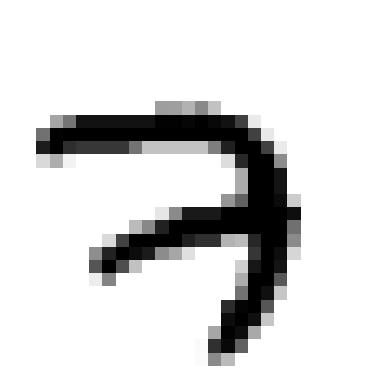

In [34]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [35]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [36]:
X_valid.shape

(5000, 28, 28)

In [37]:
X_test.shape

(10000, 28, 28)

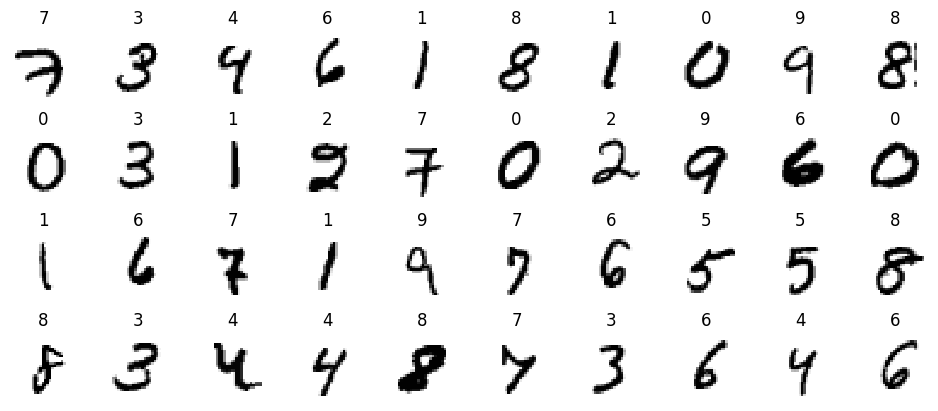

In [38]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [39]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [41]:
import numpy as np

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [44]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [45]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), callbacks=[expon_lr])

1719/1719 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.5984 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

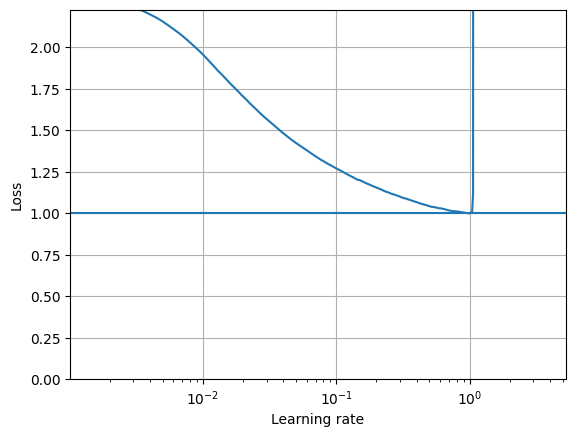

In [46]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [47]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [50]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [54]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [55]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 4.3761e-05 - accuracy: 1.0000 - val_loss: 0.0923 - val_accuracy: 0.9848
Epoch 2/100
1719/1719 [==============================] - 2s 936us/step - loss: 4.0169e-05 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 0.9848
Epoch 3/100
1719/1719 [==============================] - 1s 817us/step - loss: 3.7199e-05 - accuracy: 1.0000 - val_loss: 0.0933 - val_accuracy: 0.9846
Epoch 4/100
1719/1719 [==============================] - 1s 812us/step - loss: 3.4794e-05 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9848
Epoch 5/100
1719/1719 [==============================] - 1s 812us/step - loss: 3.2600e-05 - accuracy: 1.0000 - val_loss: 0.0941 - val_accuracy: 0.9848
Epoch 6/100
1719/1719 [==============================] - 1s 800us/step - loss: 3.0723e-05 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9848
Epoch 7/100
1719/1719 [==============================] - 1s 783us/step - loss: 2.9107e-05 - accu

In [58]:
!tensorboard --logdir=./my_mnist_logs

W0702 15:41:39.156792 6351253504 plugin_event_accumulator.py:369] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0702 15:41:39.158493 6351253504 plugin_event_accumulator.py:369] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.13.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


tensorboard --logdir=my_mnist_logs ---> my_mnist_logs ---> Folder name